### Análise de um dataset com dados do Titanic para conclusão do curso de Data Science I da Udacity

O presente projeto visa a responder à seguinte pergunta: Crianças e mulheres foram priorizados durante o desastre do Titanic? Para responder a essa pergunta principal, passamos por uma série de questões acessórias, mas de igual valor analítico. 
Para iniciar nossa análise, então, primeiramente importamos as bibliotecas a serem utilizadas e carregamos nosso dataframe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('titanic-data-6.csv')

#### Limpieza de Dados

Esse dataframe se refere a dados de passageiros do Titanic, tais como a classe em que estavam, sexo, idade, porto de embarque, etc. Assim, todas as perguntas que pretendemos responder se relacionam ao cruzamento de informações apresentadas pelos dados ali presentes. Para que possamos entender a estrutura do arquivo, tais como linhas e colunas, nomes das colunas, dentre outros dados relevantes, vamos começar nossa exploração e possíveis limpezas de dados:

In [2]:
print('\nNosso dataframe possui {} linhas e {} colunas. A tabela pode ser visualizada abaixo:'
      .format(df.shape[0], df.shape[1]))
df.head()


Nosso dataframe possui 891 linhas e 12 colunas. A tabela pode ser visualizada abaixo:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Conforme vê-se acima, nossas colunas (e seus respectivos índices) são as seguintes:

In [3]:
for i, column in enumerate(df.columns):
    print(i, column, sep='\t')

0	PassengerId
1	Survived
2	Pclass
3	Name
4	Sex
5	Age
6	SibSp
7	Parch
8	Ticket
9	Fare
10	Cabin
11	Embarked


Antes de iniciarmos qualquer análise, faz-se importante também saber quais são os tipos de dados presentes nas colunas e se existem informações faltantes: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Percebemos, acima, que nas colunas 'Age', 'Cabin' e 'Embarked' faltam alguns valores. Para resolver este problema, precisamos saber o que cada coluna representa e quais seus tipos de dados: 
- 'Age' se refere às idades dos passageiros, sendo do tipo float; 
- 'Cabin' se refere ao tipo de cabine, e aparentemente é um string (o que confirmaremos abaixo);
- 'Embarked' se refere aos portos de entrada de cada passageiro (string, conforme abaixo).

In [5]:
print('\nO tipo de dado da coluna "Embarked" é {} e de "Cabin" é {}.\n'
      .format(type(df['Embarked'].unique()[0]), type(df['Cabin'].unique()[1])))


O tipo de dado da coluna "Embarked" é <class 'str'> e de "Cabin" é <class 'str'>.



Em posse desses dados básicos, surge uma primeira dúvida: quantas passageiros estavam no navio e em quais classes?


Quantidade total: 891 passageiros.

Quantidade de passageiros: 

- 1ª classe: 216; 
- 2ª classe: 184; 
- 3ª classe: 491.



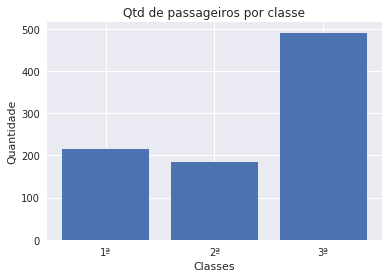

In [6]:
passageiros_total = df.shape[0]
qtd_primeira = df[ (df['Pclass'] == 1) ].shape[0]
qtd_segunda = df[ (df['Pclass'] == 2) ].shape[0]
qtd_terceira = df[ (df['Pclass'] == 3) ].shape[0]

print('\nQuantidade total: {} passageiros.'.format(passageiros_total))
print('\nQuantidade de passageiros: \n\n- 1ª classe: {}; \n- 2ª classe: {}; \n- 3ª classe: {}.\n'
      .format( qtd_primeira, qtd_segunda, qtd_terceira) )

classes = [1, 2, 3]
heights = [qtd_primeira, qtd_segunda, qtd_terceira]
labels = ['1ª', '2ª', '3ª']
plt.bar(classes, heights, tick_label=labels)
plt.title('Qtd de passageiros por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade');

Como se percebe, a quantidade de passageiros na terceira classe é superior às outras classes.

E quanto à média de idade por classe? Para responder a essa questão, precisamos preencher os campos nulos da coluna 'Age', o que faremos com o valor médio da idade de cada passageiro, da seguinte forma:

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

print('\nIdade média de todos os passageiros: {} anos.'.format(round(df['Age'].mean(), 2)))


Idade média de todos os passageiros: 29.7 anos.


Com os dados de 'Age' completos e nossa limpeza de dados concluída, podemos, agora, verificar a idade média de acordo com a classe: 

In [8]:
df_idade_media = df.groupby(["Pclass"]).mean()["Age"]
print('\nIdade média por classe:\n \n-1ª classe: {} anos;\n-2ª classe: {} anos;\n-3ª classe: {} anos.\n'
      .format(df_idade_media[1], df_idade_media[2], df_idade_media[3]))


Idade média por classe:
 
-1ª classe: 37.04811819172115 anos;
-2ª classe: 29.8669581202046 anos;
-3ª classe: 26.403258655804464 anos.



Além do dado de idade média por classe acima, vejamos também o gráfico com distribuição de passageiros por idade:

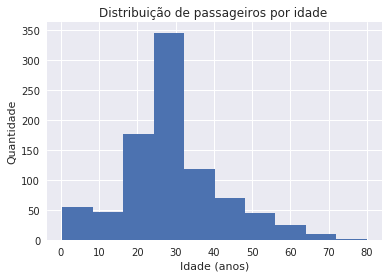

In [9]:
df_idades = df['Age']
plt.hist(df_idades)
plt.title('Distribuição de passageiros por idade ')
plt.xlabel('Idade (anos)')
plt.ylabel('Quantidade');

Percebemos que este gráfico de idades tem uma distribuição à direita, com as maiores frequências presentes entre 20 e 30 anos. Para auxiliar nossa visualização, vamos separar as idades por faixa etária, da seguinte forma: 
- Crianças (0-14)
- Jovens (15-29)
- Adultos (30-59)
- Idosos (acima de 60)


In [10]:
# Criando dataframes de acordo com faixa etária
df_criancas = df.query('Age < 15')
df_jovens = df.query('15 <= Age < 30')
df_adultos = df.query('30 <= Age < 60')
df_idosos = df.query('Age >= 60')

# Criando arrays de acordo com tamanho e tipo de faixa etária
crianca = np.repeat("child", df_criancas.shape[0])
jovem = np.repeat("teen", df_jovens.shape[0])
adulto = np.repeat("adult", df_adultos.shape[0])
idoso = np.repeat("elder", df_idosos.shape[0])

# Criando nova coluna para adicionar os arrays aos dataframes
df_criancas['Age_range'] = crianca
df_jovens['Age_range'] = jovem
df_adultos['Age_range'] = adulto
df_idosos['Age_range'] = idoso

# Formando um único dataframe
df_edited = df_criancas.append([df_jovens, df_adultos, df_idosos])
df_edited = df_edited.iloc[:, np.r_[0:6, 12, 6:12]]

/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati


Quantidade de passageiros por faixa etária:

Crianças: 	78
Jovens: 	483
Adultos: 	304
Idosos: 	26



Text(0.5,1,'Qtd de passageiros por faixa etária')

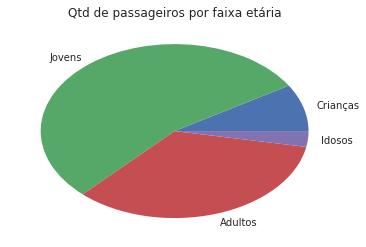

In [11]:
print('\nQuantidade de passageiros por faixa etária:\n\nCrianças: \t{}\nJovens: \t{}\nAdultos: \t{}\nIdosos: \t{}\n'.
     format(df_criancas.shape[0], df_jovens.shape[0], df_adultos.shape[0], df_idosos.shape[0]))

heights = [len(crianca), len(jovem), len(adulto), len(idoso)]
labels = ['Crianças', 'Jovens', 'Adultos', 'Idosos']
plt.pie(heights, labels=labels)
plt.title('Qtd de passageiros por faixa etária')

Para poder agrupar os passageiros por idade, criamos uma nova coluna em nosso dataframe, 'Age_range'. Assim, ele agora apresenta um total de 13 colunas, com 'Age_range' estando em consonância com a faixa etária apresentada na coluna 'Age' (vide tabela abaixo):

In [12]:
df_edited.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_range,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,child,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,child,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,child,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,child,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,child,4,1,382652,29.1250,NaN,Q


Seria interessante, agora, verificar a porcentagem de passageiros por faixa etária:


Porcentagem de passageiros por faixa etária:

Crianças: 	8.75%
Jovens: 	54.21%
Adultos: 	34.12%
Idosos: 	2.92%


Text(0.5,1,'Porcentagem de passageiros por faixa etária')

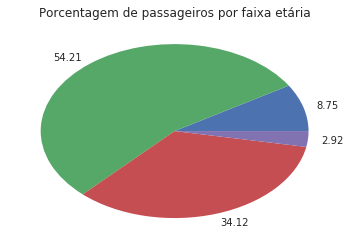

In [13]:
def calcula_porcentagem(valor_parcial, valor_total):
    """
          Função que calcula a porcentagem a partir de um valor parcial e um valor total.
          Argumentos:
              valor_parcial: valor em int ou float .
              valor_total: valor em int ou float que representa 100% do que se deseja calcular.
          Retorna:
              Um valor em int ou float multiplicado por 100 e com duas casas decimais.
    """
    return round(valor_parcial / valor_total * 100, 2)

porcent_criancas = calcula_porcentagem(df_criancas.shape[0], passageiros_total)
porcent_jovens = calcula_porcentagem(df_jovens.shape[0], passageiros_total)
porcent_adultos = calcula_porcentagem(df_adultos.shape[0], passageiros_total)
porcent_idosos = calcula_porcentagem(df_idosos.shape[0], passageiros_total)

print('\nPorcentagem de passageiros por faixa etária:\n\nCrianças: \t{}%\nJovens: \t{}%\nAdultos: \t{}%\nIdosos: \t{}%'.
     format(porcent_criancas, porcent_jovens, 
            porcent_adultos, porcent_idosos))

heights = [len(crianca), len(jovem), len(adulto), len(idoso)]
labels = [porcent_criancas, porcent_jovens, porcent_adultos, porcent_idosos]
plt.pie(heights, labels=labels)
plt.title('Porcentagem de passageiros por faixa etária')

Os jovens (faixa entre 15 e 29 anos) são os mais numerosos, performando quase 55% dos passageiros do Titanic. Mas, afinal, quantas pessoas sobreviveram? E qual a porcentagem de sobreviventes de acordo com classe, idade e sexo?

In [14]:
sobreviventes = df_edited.query('Survived == 1')["Survived"].count()
vitimas = df_edited.query('Survived == 0')["Survived"].count()
print('\nTotal de sobreviventes: {} \nTotal de vítimas: {}\n'
      .format(sobreviventes, vitimas) )


Total de sobreviventes: 342 
Total de vítimas: 549



In [15]:
qtd_primeira = df_edited[ (df_edited['Pclass'] == 1) ].shape[0]
qtd_segunda = df_edited[ (df_edited['Pclass'] == 2) ].shape[0]
qtd_terceira = df_edited[ (df_edited['Pclass'] == 3) ].shape[0]
print('\nQuantidade de passageiros por classe: \n\nPrimeira classe: \t{} \nSegunda classe: \t{} \nTerceira classe: \t{}\n'
      .format( qtd_primeira, qtd_segunda, qtd_terceira) )


Quantidade de passageiros por classe: 

Primeira classe: 	216 
Segunda classe: 	184 
Terceira classe: 	491



In [16]:
total_passageiros = df.shape[0]
sobre_primeira = df_edited[ (df_edited['Pclass'] == 1) & (df_edited['Survived'] == 1) ].shape[0]
sobre_segunda = df_edited[ (df_edited['Pclass'] == 2) & (df_edited['Survived'] == 1) ].shape[0]
sobre_terceira = df_edited[ (df_edited['Pclass'] == 3) & (df_edited['Survived'] == 1) ].shape[0]

print('\nQuantidade de sobreviventes por classe: \n\nPrimeira classe: \t{} \nSegunda classe: \t{} \nTerceira classe: \t{}\n'
      .format(sobre_primeira, sobre_segunda, sobre_terceira)) 
print('\nPorcentagem de sobreviventes por classe: \n\nPrimeira classe: \t{}% \nSegunda classe: \t{}% \nTerceira classe: \t{}%\n'
      .format(calcula_porcentagem(sobre_primeira, qtd_primeira), 
              calcula_porcentagem(sobre_segunda,qtd_segunda), 
              calcula_porcentagem(sobre_terceira, qtd_terceira)))


Quantidade de sobreviventes por classe: 

Primeira classe: 	136 
Segunda classe: 	87 
Terceira classe: 	119


Porcentagem de sobreviventes por classe: 

Primeira classe: 	62.96% 
Segunda classe: 	47.28% 
Terceira classe: 	24.24%



In [17]:
sobreviventes_faixa = df_edited[ (df_edited['Survived'] == 1) ].groupby('Age_range').count()['Survived']

print('\nPorcentagem de sobreviventes por faixa etária:\n\nCrianças: \t{}%\nJovens: \t{}%\nAdultos: \t{}%\nIdosos: \t{}%\n'.
     format(calcula_porcentagem(sobreviventes_faixa[1],df_criancas.shape[0]), 
            calcula_porcentagem(sobreviventes_faixa[0], df_jovens.shape[0]), 
            calcula_porcentagem(sobreviventes_faixa[3],df_adultos.shape[0]),
            calcula_porcentagem(sobreviventes_faixa[2],df_idosos.shape[0])))


Porcentagem de sobreviventes por faixa etária:

Crianças: 	57.69%
Jovens: 	26.29%
Adultos: 	53.62%
Idosos: 	26.92%



In [18]:
total_homens = df_edited[ (df_edited['Sex'] == 'male') ].shape[0]
total_mulheres = df_edited[(df_edited['Sex'] == 'female')].shape[0]
sobreviventes_homens = df_edited[ (df_edited['Sex'] == 'male') & (df_edited['Survived'] == 1)].groupby('Sex').count()['Survived']
sobreviventes_mulheres = df_edited[ (df_edited['Sex'] == 'female') & (df_edited['Survived'] == 1)].groupby('Sex').count()['Survived']

print('\nQuantidade de passageiros por sexo: \n\nHomens: \t{} \nMulheres: \t{}\n'
      .format( total_homens, total_mulheres) )

print('\nQuantidade de sobreviventes por sexo: \n\nHomens: \t{} \nMulheres: \t{}\n'
      .format( sobreviventes_homens[0], sobreviventes_mulheres[0]) )

print('Porcentagem de sobreviventes por sexo:\n\nHomens: \t{}%\nMulheres: \t{}%\n'.
     format(calcula_porcentagem(sobreviventes_homens[0], total_homens), 
            calcula_porcentagem(sobreviventes_mulheres[0], total_mulheres)))


Quantidade de passageiros por sexo: 

Homens: 	577 
Mulheres: 	314


Quantidade de sobreviventes por sexo: 

Homens: 	109 
Mulheres: 	233

Porcentagem de sobreviventes por sexo:

Homens: 	18.89%
Mulheres: 	74.2%



Com isso, reparamos que quase 75% das mulheres conseguiram se salvar no desastre, enquanto aproximadamente 19% dos homens sobreviveram. Já havíamos visto acima, também, que apenas por volta de 58% das crianças conseguiram sobreviver:

In [19]:
total_criancas = df_criancas.shape[0]
sobreviventes_criancas = sobreviventes_faixa[1]
print('\nDo total de {} crianças, apenas {} sobreviveram.\n'
      .format( total_criancas,  sobreviventes_criancas) )


Do total de 78 crianças, apenas 45 sobreviveram.



Interessante notar que a porcentagem de crianças salvas foi inferior à porcentagem de mulheres salvas. Sabe-se que, em casos de graves acidentes como o do Titanic, a preferência se dá a mulheres e crianças, e neste caso a regra teria sido mantida no caso das mulheres, mas não necessariamente das crianças (quando comparadas às mulheres). Mas existe um problema neste nosso pensamento: para chegar a uma conclusão, temos de avaliar quantas são as crianças dentro do grupo de mulheres, para então recalcularmos a taxa de mulheres sobreviventes e então compará-las às crianças:

In [20]:
mulheres_nao_criancas = df_edited[(df_edited['Survived']==1)&(df_edited['Sex']=='female')&(df_edited['Age'] > 14)]
qtd_mulheres_nao_criancas = mulheres_nao_criancas.count()['Sex']

print('\nA quantidade de mulheres sobreviventes acima da idade de 14 anos é de {}.'.
      format(qtd_mulheres_nao_criancas))
      
print('\nA porcentagem de mulheres (não crianças) atualizada é de {}%.\n'
      .format(calcula_porcentagem(qtd_mulheres_nao_criancas, total_mulheres)))


A quantidade de mulheres sobreviventes acima da idade de 14 anos é de 209.

A porcentagem de mulheres (não crianças) atualizada é de 66.56%.



Conforme verificado, a porcentagem de mulheres, com o cálculo desconsiderando crianças do sexo feminino, baixou para 66,56%, aproximando-se mais da porcentagem de crianças sobreviventes, mas mesmo assim acima. Pensando nesta taxa de crianças sobreviventes inferior à de mulheres, queremos agora comparar também a porcentagem de mulheres e crianças sobreviventes por classe, para ver se houve algum tipo de privilégio ou prejuízo:


Havia 94 mulheres na primeira classe, 76 na segunda e 144 terceira:



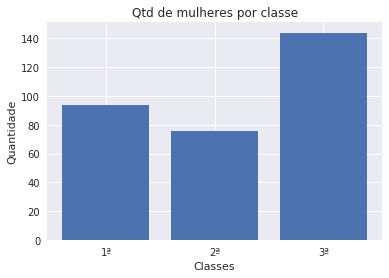

In [21]:
mulheres_classe = df_edited[ (df_edited['Sex'] == 'female') ].groupby('Pclass')
sobre_mulheres_classe = df_edited[ (df_edited['Sex'] == 'female') & (df_edited['Survived'] == 1)].groupby('Pclass')

print('\nHavia {} mulheres na primeira classe, {} na segunda e {} terceira:\n'.
     format(mulheres_classe['Pclass'].count()[1], mulheres_classe['Pclass'].count()[2], mulheres_classe['Pclass'].count()[3]))

classes = [1, 2, 3]
heights = [mulheres_classe['Pclass'].count()[1], mulheres_classe['Pclass'].count()[2], mulheres_classe['Pclass'].count()[3]]
labels = ['1ª', '2ª', '3ª']
plt.bar(classes, heights, tick_label=labels)
plt.title('Qtd de mulheres por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade');




Dessas, sobreviveram 91 mulheres da primeira, 70 da segunda e 72 da terceira classes:



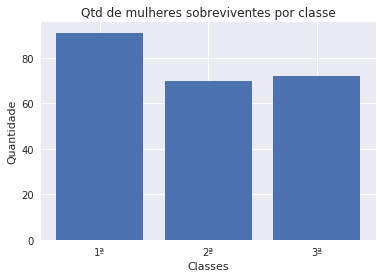

In [22]:
print('\nDessas, sobreviveram {} mulheres da primeira, {} da segunda e {} da terceira classes:\n'.
     format(sobre_mulheres_classe['Pclass'].count()[1], sobre_mulheres_classe['Pclass'].count()[2], sobre_mulheres_classe['Pclass'].count()[3]))

classes = [1, 2, 3]
heights = [sobre_mulheres_classe['Pclass'].count()[1], sobre_mulheres_classe['Pclass'].count()[2], sobre_mulheres_classe['Pclass'].count()[3]]
labels = ['1ª', '2ª', '3ª']
plt.bar(classes, heights, tick_label=labels)
plt.title('Qtd de mulheres sobreviventes por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade');

A diferença de mulheres sobreviventes entre classes permite concluir que as mulheres da primeira classe foram bastante privilegiadas em detrimento das mulheres da terceira classe. Isso, por óbvio, não significa afirmar que houve um privilégio deliberado em relação às pessoas mais ricas que podiam pagar por melhores lugares no navio. Por exemplo, pode-se pensar que as pessoas da terceira classe, por estarem hospedadas nas partes mais inferiores do navio, não tiveram tempo para subir em direção aos botes salva-vidas (conforme visto anteriormente, apenas 24% dos passageiros da terceira classe conseguiram sobreviver). A seguir, vejamos as crianças em relação a suas respectivas classes:


Havia 5 crianças na primeira classe, 19 na segunda e 54 terceira:



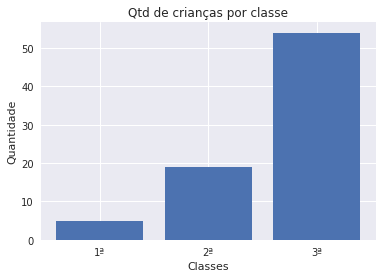

In [23]:
criancas_classe = df_edited[ (df_edited['Age_range'] == 'child') ].groupby('Pclass')
sobre_criancas_classe = df_edited[ (df_edited['Age_range'] == 'child') & (df_edited['Survived'] == 1)].groupby('Pclass')

print('\nHavia {} crianças na primeira classe, {} na segunda e {} terceira:\n'.
     format(criancas_classe['Pclass'].count()[1], criancas_classe['Pclass'].count()[2], criancas_classe['Pclass'].count()[3]))

classes = [1, 2, 3]
heights = [criancas_classe['Pclass'].count()[1], criancas_classe['Pclass'].count()[2], criancas_classe['Pclass'].count()[3]]
labels = ['1ª', '2ª', '3ª']
plt.bar(classes, heights, tick_label=labels)
plt.title('Qtd de crianças por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade');


Dessas, sobreviveram 4 crianças da primeira, 19 da segunda e 22 da terceira classes:



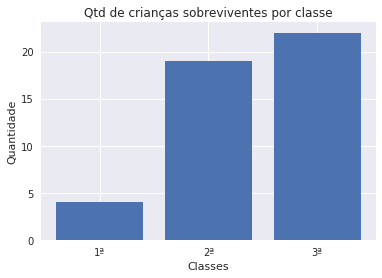

In [24]:
sobre_criancas_classe
print('\nDessas, sobreviveram {} crianças da primeira, {} da segunda e {} da terceira classes:\n'.
     format(sobre_criancas_classe['Pclass'].count()[1], 
            sobre_criancas_classe['Pclass'].count()[2], 
            sobre_criancas_classe['Pclass'].count()[3]))

classes = [1, 2, 3]
heights = [sobre_criancas_classe['Pclass'].count()[1], sobre_criancas_classe['Pclass'].count()[2], sobre_criancas_classe['Pclass'].count()[3]]
labels = ['1ª', '2ª', '3ª']
plt.bar(classes, heights, tick_label=labels)
plt.title('Qtd de crianças sobreviventes por classe')
plt.xlabel('Classes')
plt.ylabel('Quantidade');

Na comparação entre os dois gráficos, vemos que apenas uma criança (de cinco), da primeira classe, foi salva; todas as crianças da segunda classe conseguiram se salvar e apenas 22 de 54 da terceira sobreviveram.

#### Conclusões

Por fim, podemos concluir que mulheres e crianças foram priorizadas em relação a homens e idosos, mas crianças foram ligeiramente preteridas em relação a mulheres. Além disso, numa comparação de classes em que mulheres se encontravam, pudemos visualizar uma grande diferença entre as mulheres salvas da primeira e da segunda classe em relação àquelas da terceira. E quanto às crianças, vimos que havia cinco crianças na primeira classe e apenas uma sobreviveu, mas na segunda todas conseguiram sair com vida do navio. A preferência, aparentemente, foi dada às duas primeiras classes, mas, por motivos que desconhecemos, quatro crianças da primeira classe foram vítimas do acidente. Na terceira classe, infelizmente, apenas 22 crianças foram salvas (menos da metade ali presentes).

Muitas eram as perguntas possíveis que gostaríamos de continuar a responder, tais como: as crianças que morreram tinham parentes? Eles também morreram? É possível descobrir se uma pessoa é parente de outra a partir do sobrenome? E muitas outras questões que foram surgindo e aguçaram nossa curiosidade. Pretendemos, num futuro próximo, tratar de muitos outros pontos, devido à multiplicidade de questões que um dataset, inicialmente tão simples, pode nos fornecer.

#### Limitações

Como observado durante à exploração dos dados no início deste projeto, havia colunas com valores vazios: 'Age', 'Cabin' e 'Embarked'. Os dados faltantes de 'Cabin' e 'Embarked' não foram tratados nesta presente análise; lidamos apenas com 'Age', cuja completude de dados era essencial para nossa análise. Dessa forma, utilizamos o valor médio da idade para preencher os dados que faltavam na coluna 'Age'.
Além disso, a fim de facilitar a visualização das idades, sugerimos e aplicamos uma divisão em quatro categorias de idade:
- Crianças (0-14)
- Jovens (15-29)
- Adultos (30-59)
- Idosos (acima de 60)

Logo depois, editamos o dataframe para incluir uma nova coluna, chamada 'Age_range', com os valores 'child', 'teen', 'adult' e 'elder', todos relacionados às suas respectivas faixas etárias.